EDA on Metro Bike
This exploratory data analysis (EDA) delves into the usage patterns and trends of the Metro Bike system. By examining factors such as trip duration, popular routes, and potential areas for improvement.

In [22]:
# Importing libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Importing dataset
mt = pd.read_csv(r'C:\Users\hp\Documents\metro_trips.csv', low_memory=False)
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994880 entries, 0 to 994879
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              994880 non-null  int64  
 1   duration             994880 non-null  int64  
 2   start_time           994880 non-null  object 
 3   end_time             994880 non-null  object 
 4   start_station        994880 non-null  int64  
 5   start_lat            994755 non-null  float64
 6   start_lon            994755 non-null  float64
 7   end_station          994880 non-null  int64  
 8   end_lat              976924 non-null  float64
 9   end_lon              976923 non-null  float64
 10  bike_id              994880 non-null  object 
 11  plan_duration        994880 non-null  int64  
 12  trip_route_category  994880 non-null  object 
 13  passholder_type      994722 non-null  object 
 14  bike_type            994880 non-null  object 
dtypes: float64(4), in

In [24]:
# Removing nulls and dropping duplicates 
mt_cleaned = mt.dropna().drop_duplicates().reset_index()
mt_cleaned.info()
mt_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976741 entries, 0 to 976740
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                976741 non-null  int64  
 1   trip_id              976741 non-null  int64  
 2   duration             976741 non-null  int64  
 3   start_time           976741 non-null  object 
 4   end_time             976741 non-null  object 
 5   start_station        976741 non-null  int64  
 6   start_lat            976741 non-null  float64
 7   start_lon            976741 non-null  float64
 8   end_station          976741 non-null  int64  
 9   end_lat              976741 non-null  float64
 10  end_lon              976741 non-null  float64
 11  bike_id              976741 non-null  object 
 12  plan_duration        976741 non-null  int64  
 13  trip_route_category  976741 non-null  object 
 14  passholder_type      976741 non-null  object 
 15  bike_type        

,index,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,0,181126929,1440,1/20/2022 7:18,1/22/2022 8:30,3074,34.044170,-118.261169,4453,34.082649,-118.284393,12055,365,One Way,Annual Pass,standard
1,2,186073484,1440,03/10/2022 07:10,3/13/2022 14:26,4482,34.094372,-118.331009,4482,34.094372,-118.331009,15238,365,Round Trip,Annual Pass,standard
2,3,186285140,1440,03/10/2022 21:04,3/15/2022 9:37,3005,34.048500,-118.258537,4513,34.083710,-118.296021,16992,365,One Way,Annual Pass,electric
3,4,186246165,1440,3/13/2022 21:08,3/15/2022 7:43,3052,34.051102,-118.264557,3074,34.044170,-118.261169,19331,365,One Way,Annual Pass,electric
4,5,186953513,1440,3/19/2022 21:34,3/22/2022 8:40,4491,34.047440,-118.247940,4491,34.047440,-118.247940,16716,365,Round Trip,Annual Pass,electric


In [25]:
# Average duration of bike trips
avg_duration = mt_cleaned['duration'].mean()
print(f"The typical trip duration is {avg_duration:.2f} minutes")

The typical trip duration is 31.75 minutes


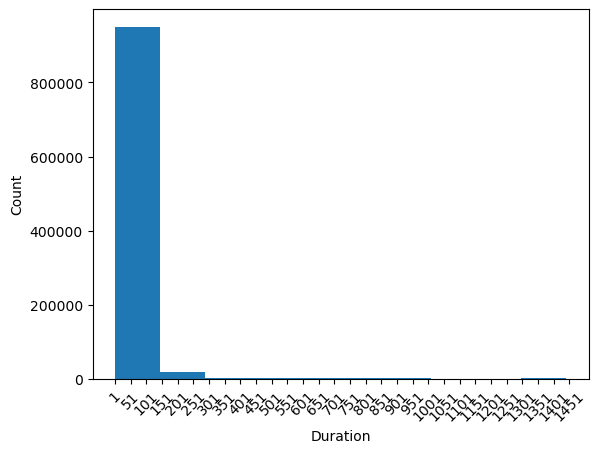

In [26]:
# Creating a histogram to check duration distribution
plt.hist(mt_cleaned['duration'])
plt.xticks(range(1, 1500, 50), rotation=45)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

The left-skewed distrubution revealed by the histogram indicates that most trips are shorter, with a few longer rides. 

In [27]:
# Comparing average duration for various passholder types
mt_cleaned['passholder_type'].value_counts()

passholder_type
Monthly Pass    580467
Walk-up         212785
Annual Pass      92412
One Day Pass     91077
Name: count, dtype: int64

There are four passholder types; monthly, walk-up, annual, and one day passes.

In [28]:
# Creating dataframes for each passholder type
mpt = mt_cleaned[mt_cleaned['passholder_type']=='Monthly Pass'] # dataframe for monthly pass passholders
wpt = mt_cleaned[mt_cleaned['passholder_type']=='Walk-up'] # dataframe for walk-up passholders
apt = mt_cleaned[mt_cleaned['passholder_type']=='Annual Pass'] # dataframe for annual passholders
opt = mt_cleaned[mt_cleaned['passholder_type']=='One Day Pass'] # dataframe for one day passholders
# Evaluating mean duration for the various passholders
mpt_avg = mpt['duration'].mean()
print(f"The average trip duration for Monthly pass passholders is {mpt_avg:.2f} minutes")
wpt_avg = wpt['duration'].mean()
print(f"The average trip duration for Walk-up passholders is {wpt_avg:.2f} minutes")
apt_avg = apt['duration'].mean()
print(f"The average trip duration for Annual pass passholders is {apt_avg:.2f} minutes")
opt_avg = opt['duration'].mean()
print(f"The average trip duration for One Day Pass passholders is {opt_avg:.2f} minutes")

The average trip duration for Monthly pass passholders is 19.45 minutes
The average trip duration for Walk-up passholders is 57.26 minutes
The average trip duration for Annual pass passholders is 14.19 minutes
The average trip duration for One Day Pass passholders is 68.38 minutes


The average trip durations for monthly pass holders and annual pass holders is significantly lower than the overall average trip duration, while the trip durations for one day and walk_up passholders is higher than the overall average trip duration of 31.75 minutes.

In [29]:
# Route Type popularity
mt_cleaned.value_counts(['trip_route_category'])

trip_route_category
One Way                800305
Round Trip             176436
Name: count, dtype: int64

One Way trips are more popular with 82% of trips being One Way while 18% are Round Trips.

In [30]:
# Comparing average trip duration between one-way and round-trips
OneWayTrip = mt_cleaned[mt_cleaned['trip_route_category']=='One Way'] # dataframe for One Way trips
RoundTrip = mt_cleaned[mt_cleaned['trip_route_category']=='Round Trip'] # dataframe for Round Trips
# Evaluating the average trip duration
OneWayTrip_avg = OneWayTrip['duration'].mean()
print(f"The average trip duration for One Way Trip is {OneWayTrip_avg:.2f} minutes")
RoundTrip_avg = RoundTrip['duration'].mean()
print(f"The average Round Trip duration is {RoundTrip_avg:.2f} minutes")

The average trip duration for One Way Trip is 26.42 minutes
The average Round Trip duration is 55.93 minutes


Round trips tend to take a higher duration than one way trips.

In [31]:
# Most used starting station
StartStation = mt_cleaned['start_station'].value_counts()
StartStation.head(1)

start_station
4214    49659
Name: count, dtype: int64

The most used starting station is station 4214, in which 49,659 trips starting at station 4214.

In [32]:
# Most used stopping station
EndStation = mt_cleaned['end_station'].value_counts()
EndStation.head(1)

end_station
4215    47189
Name: count, dtype: int64

47,189 trips stopped at station 4215, which is the most used stopping station.

In [33]:
# Bike Types
mt_cleaned['bike_type'].value_counts()

bike_type
standard    522864
electric    453855
smart           22
Name: count, dtype: int64

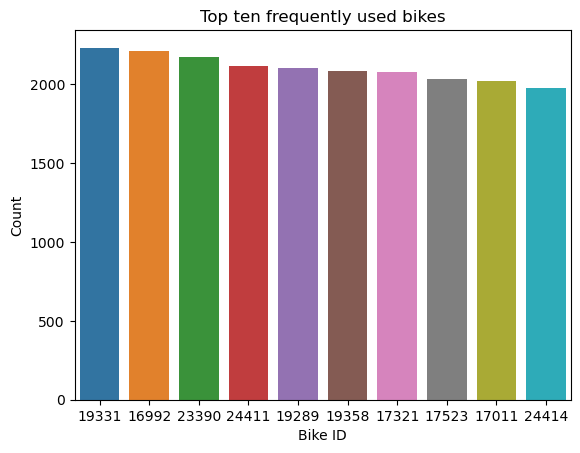

In [34]:
# Top ten bikes used more frequently than others
freq = mt_cleaned['bike_id'].value_counts().reset_index(name='count').head(10)
# Creating a bar chart of thr top ten frequently used bikes
sns.barplot(x='bike_id', y='count', data = freq)
plt.title('Top ten frequently used bikes')
plt.yticks(range(0, 2500, 500))
plt.xlabel('Bike ID')
plt.ylabel('Count')
plt.show()

In [35]:
# To check bike type of frequently used bikes
freqBikes = ['19331', '16992', '23390', '24411', '19289', '19358', '17321', '17523', '17011', '24414']
filteredFreq = mt_cleaned[mt_cleaned['bike_id'].isin(freqBikes)]
ID_and_BikeType = filteredFreq[['bike_id', 'bike_type']]
ID_and_BikeType.head(10)

,bike_id,bike_type
2,16992,electric
3,19331,electric
60,16992,electric
61,19358,electric
63,16992,electric
109,24411,electric
139,24414,electric
162,17523,electric
204,19289,electric
205,24414,electric


Despite more standard bikes being available, electric bikes were more used in trips. The most used bikes being electric bikes might explain the variation in bike usage. 

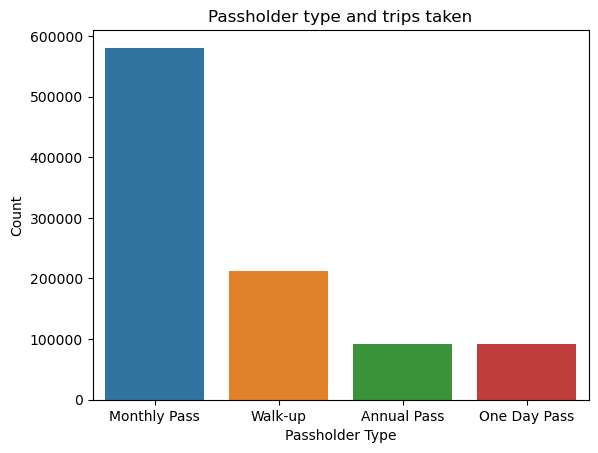

In [36]:
# Passholders that took the most rides
passholderDuration = mt_cleaned['passholder_type'].value_counts().reset_index()
sns.barplot(x='passholder_type', y='count', data = passholderDuration)
plt.title('Passholder type and trips taken')
plt.xlabel('Passholder Type')
plt.ylabel('Count')
plt.show()

The bar chart shows that Monthly Pass holders take significantly more rides than Walk-up, Annual, and One Day passholders.

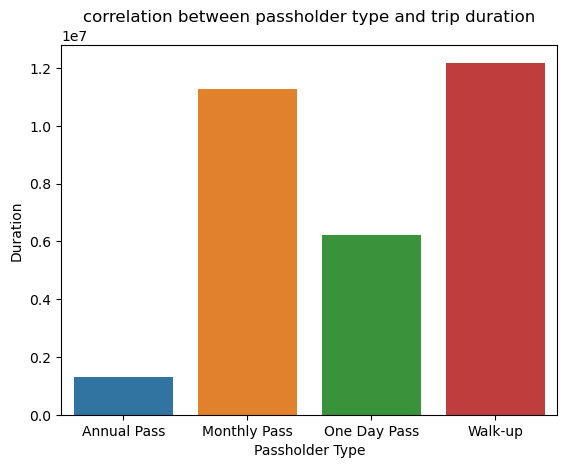

In [37]:
# Correlation between trip duration and passholder type
grouped_data = mt_cleaned.groupby('passholder_type')['duration'].sum().reset_index()
sns.barplot(x='passholder_type', y='duration', data = grouped_data)
plt.title('correlation between passholder type and trip duration')
plt.xlabel('Passholder Type')
plt.ylabel('Duration')
plt.show()

Members who hold Walk-up passes take the longest trips of the four passholder types, followed by monthly passholders, one day pass and finally annual passholders.

In [38]:
# Commonly used station pairs (start and end stations)
# Concatenating start and end staions
mt_cleaned['Popular Routes'] = mt_cleaned['start_station'].astype(str) + ' - ' + mt_cleaned['end_station'].astype(str)
print('Popular routes;')
print(mt_cleaned['Popular Routes'])
# Popular routes
route = mt_cleaned['Popular Routes'].value_counts().reset_index(name='number of trips')
print('Top fifteen popular routes and number of trips;')
route.head(15)

Popular routes;
0         3074 - 4453
1         4482 - 4482
2         3005 - 4513
3         3052 - 3074
4         4491 - 4491
             ...     
976736    4536 - 4536
976737    4210 - 4210
976738    4214 - 4214
976739    4315 - 4315
976740    4478 - 4478
Name: Popular Routes, Length: 976741, dtype: object
Top fifteen popular routes and number of trips;


,Popular Routes,number of trips
0,4214 - 4214,18919
1,4214 - 4215,14315
2,4210 - 4210,9912
3,4215 - 4215,9090
4,4544 - 4544,8641
5,4543 - 4543,8566
6,4215 - 4214,7246
7,4210 - 4215,7115
8,4214 - 4210,6646
9,4210 - 4214,5802


In the top ten start and end station pairs, five were round trips, with station 4214 and 4210 having 18,919 and 9,912 round trips respectively. Station pairs 4214 - 4215 and 4215 - 4214 has the most one-way trips with 14,315 and 7,246 trips respectively between the pairs. There is a notable frequency of trips between staion pairs 4215 and 4214, with a combined 21,561 trips between the pair.